In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pywt 

# 데이터 입력

(48158, 8)
0        1226.693300
1        1226.704436
2        1226.715693
3        1226.727068
4        1226.738561
            ...     
48153    1298.977022
48154    1298.977037
48155    1298.977049
48156    1298.977060
48157    1298.977070
Name: 4, Length: 48158, dtype: float64


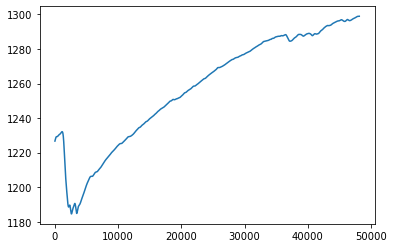

In [19]:
raw_data = pd.read_csv('./Sensor_Data/FS2e1.csv', sep=',', header=None)
print(raw_data.shape)
print(raw_data.iloc[:,4])  #GSR Raw data 표시 (확인용) 
plt.plot(raw_data.iloc[:,4])  # GSR RAW data 그래프 표현

Column E : (4th) 가 GSR 데이터에 해당 

In [9]:
mother_wavelet = pywt.Wavelet('db3')
decomp_level = 10
coeffs = pywt.wavedec(raw_data.iloc[:,4], mother_wavelet, level=decomp_level) 

In [47]:
plt.figure(figsize=(15,20))

<Figure size 1080x1440 with 0 Axes>

<Figure size 1080x1440 with 0 Axes>

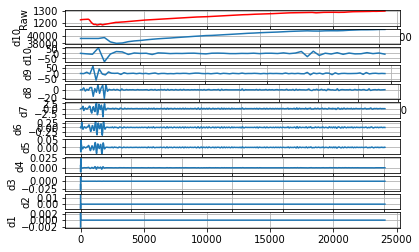

In [25]:
plt.subplot(decomp_level+2, 1, 1)
plt.plot(raw_data.iloc[:, 4], color = 'r')
plt.ylabel('Raw')
plt.grid()

plt.subplot(decomp_level+2, 1, 2)
plt.plot(coeffs[0])
plt.ylabel('d%d'%decomp_level)
plt.grid()

for k in range(1, decomp_level+1):
    plt.subplot(decomp_level+2, 1, k+2)
    plt.plot(coeffs[k])
    plt.ylabel('d%d'%(decomp_level+1-k))
    plt.grid()